In [2]:
import pybamm;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp,sqrt;
import matplotlib as mpl; 
fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing;import pandas as pd   ;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [6]:
# Read cell-1 and 2 from 0.5C to 4C - done by Ruihe, calanedar age aleady ~98.36% at 0.5C
# Read Cell-1 2.5C to 3C:
#BasicPath = "C:/Users/rl1120/OneDrive - Imperial College London/"
BasicPath = "D:/OneDrive - Imperial College London/SimDataSave/InputData/" 

Target = "Ruihe_newLGM50_Crate/"
Cell_1_2p5to3C = pd.read_csv(
    BasicPath + Target + "dicharge_2.5C_3C_ch_a_1_CA1.txt", #engine='python',
    encoding = "shift-jis",  skiprows = 1,
    sep ='\t', header=None)
Cell_1_2p5to3C.head()
newNames = [
    "time/s", "Ns","Ecell/V", "I/mA", 
    "(Q-Qo)/mA.h", "Temperature/ｰC", 
    "Q charge/mA.h","Q discharge/mA.h","R/Ohm"]
oldNames = np.arange(9).tolist()
Cell_1_2p5to3C=Cell_1_2p5to3C.rename(columns={i:j for i,j in zip(oldNames,newNames)})
Cell_1_2p5to3C.head()
# Get Cell-1 2.5C and 3C:
font = {'family' : 'DejaVu Sans','size'   : 14};   mpl.rc('font', **font)
Cell_1_2p5C = Cell_1_2p5to3C[(Cell_1_2p5to3C['Ns']==5)]
df_dc4 = Cell_1_2p5to3C[(Cell_1_2p5to3C['Ns']==12)]
Cell_1_3C = Cell_1_2p5to3C[(Cell_1_2p5to3C['Ns']==12)]
# Read Cell-2 2.5C to 3C:
Cell_2_2p5to3C = pd.read_csv(
    BasicPath + Target + "dicharge_2.5C_3C_ch_a_2_CA2.txt", #engine='python',
    encoding = "shift-jis",  skiprows = 1,
    sep ='\t', header=None)
Cell_2_2p5to3C.head()
newNames = [
    "time/s", "Ns","Ecell/V", "I/mA", 
    "(Q-Qo)/mA.h", "Temperature/ｰC", 
    "Q charge/mA.h","Q discharge/mA.h","R/Ohm"]
oldNames = np.arange(9).tolist()
Cell_2_2p5to3C=Cell_2_2p5to3C.rename(columns={i:j for i,j in zip(oldNames,newNames)})
Cell_2_2p5to3C.head()
Cell_2_2p5C = Cell_2_2p5to3C[(Cell_2_2p5to3C['Ns']==5)]
df_dc4 = Cell_2_2p5to3C[(Cell_2_2p5to3C['Ns']==12)]
Cell_2_3C = Cell_2_2p5to3C[(Cell_2_2p5to3C['Ns']==12)]
# Read Cell-1 3.5C to 4C:
Cell_1_3p5to4C = pd.read_csv(
    BasicPath + Target + "Discharge_test_3p5_to_4C_A1_CA1.txt", #engine='python',
    encoding = "shift-jis",  skiprows = 1,
    sep ='\t', header=None)
Cell_1_3p5to4C.head()
newNames = [
    "time/s", "Ns","Ecell/V", "I/mA", 
    "(Q-Qo)/mA.h", "Temperature/ｰC", 
    "Q charge/mA.h","Q discharge/mA.h","R/Ohm"]
oldNames = np.arange(9).tolist()
Cell_1_3p5to4C=Cell_1_3p5to4C.rename(columns={i:j for i,j in zip(oldNames,newNames)})
Cell_1_3p5to4C.head()
Cell_1_3p5C = Cell_1_3p5to4C[(Cell_1_3p5to4C['Ns']==5)]
df_dc4 = Cell_1_3p5to4C[(Cell_1_3p5to4C['Ns']==12)]
Cell_1_4C = Cell_1_3p5to4C[(Cell_1_3p5to4C['Ns']==12)]
# Read Cell-2 3.5C to 4C:
Cell_2_3p5to4C = pd.read_csv(
    BasicPath + Target + "Discharge_test_3p5_to_4C_A2_CA3.txt", #engine='python',
    encoding = "shift-jis",  skiprows = 1,
    sep ='\t', header=None)
Cell_2_3p5to4C.head()
newNames = [
    "time/s", "Ns","Ecell/V", "I/mA", 
    "(Q-Qo)/mA.h", "Temperature/ｰC", 
    "Q charge/mA.h","Q discharge/mA.h","R/Ohm"]
oldNames = np.arange(9).tolist()
Cell_2_3p5to4C=Cell_2_3p5to4C.rename(columns={i:j for i,j in zip(oldNames,newNames)})
Cell_2_3p5to4C.head()
Cell_2_3p5C = Cell_2_3p5to4C[(Cell_2_3p5to4C['Ns']==5)]
df_dc4 = Cell_2_3p5to4C[(Cell_2_3p5to4C['Ns']==12)]
Cell_2_4C = Cell_2_3p5to4C[(Cell_2_3p5to4C['Ns']==12)]
# Read Cell-2 up to 2C:
Cell_2_UpTo2C = pd.read_csv(
    BasicPath + Target + "dicharge_to_2C_ch_a_2_CA2.txt", #engine='python',
    encoding = "shift-jis",  skiprows = 1,
    sep ='\t', header=None)
Cell_2_UpTo2C.head()
newNames = [
    "time/s", "Ns","Ecell/V", "I/mA", 
    "(Q-Qo)/mA.h", "Temperature/ｰC", 
    "Q charge/mA.h","Q discharge/mA.h","R/Ohm"]
oldNames = np.arange(9).tolist()
Cell_2_UpTo2C=Cell_2_UpTo2C.rename(columns={i:j for i,j in zip(oldNames,newNames)})
Cell_2_UpTo2C.head()

Cell_2_0p5C = Cell_2_UpTo2C[(Cell_2_UpTo2C['Ns']==5)]
Cell_2_1C = Cell_2_UpTo2C[(Cell_2_UpTo2C['Ns']==12)]
Cell_2_1p25C = Cell_2_UpTo2C[(Cell_2_UpTo2C['Ns']==19)]
Cell_2_1p5C = Cell_2_UpTo2C[(Cell_2_UpTo2C['Ns']==26)]
Cell_2_1p75C = Cell_2_UpTo2C[(Cell_2_UpTo2C['Ns']==33)]
Cell_2_2C = Cell_2_UpTo2C[(Cell_2_UpTo2C['Ns']==40)]
# Read Cell-1 up to 2C:

Cell_1_UpTo2C = pd.read_csv(
    BasicPath + Target + "dicharge_to_2C_ch_a_1_CA1.txt", #engine='python',
    encoding = "shift-jis",  skiprows = 1,
    sep ='\t', header=None)
Cell_1_UpTo2C.head()
newNames = [
    "time/s", "Ns","Ecell/V", "I/mA", 
    "(Q-Qo)/mA.h", "Temperature/ｰC", 
    "Q charge/mA.h","Q discharge/mA.h","R/Ohm"]
oldNames = np.arange(9).tolist()
Cell_1_UpTo2C=Cell_1_UpTo2C.rename(columns={i:j for i,j in zip(oldNames,newNames)})
Cell_1_UpTo2C.head()

Cell_1_0p5C = Cell_1_UpTo2C[(Cell_1_UpTo2C['Ns']==5)]
Cell_1_1C = Cell_1_UpTo2C[(Cell_1_UpTo2C['Ns']==12)]
Cell_1_1p25C = Cell_1_UpTo2C[(Cell_1_UpTo2C['Ns']==19)]
Cell_1_1p5C = Cell_1_UpTo2C[(Cell_1_UpTo2C['Ns']==26)]
Cell_1_1p75C = Cell_1_UpTo2C[(Cell_1_UpTo2C['Ns']==33)]
Cell_1_2C = Cell_1_UpTo2C[(Cell_1_UpTo2C['Ns']==40)]
# collect all together
Cell_2_All = [
    Cell_2_0p5C,Cell_2_1C,Cell_2_1p25C,Cell_2_1p5C,Cell_2_1p75C,
    Cell_2_2C,Cell_2_2p5C,Cell_2_3C,Cell_2_3p5C,Cell_2_4C];
Cell_1_All = [
    Cell_1_0p5C,Cell_1_1C,Cell_1_1p25C,Cell_1_1p5C,Cell_1_1p75C,
    Cell_1_2C,Cell_1_2p5C,Cell_1_3C,Cell_1_3p5C,Cell_1_4C];
str_Crate = ["0.5","1","1.25","1.5","1.75","2","2.5","3","3.5","4",]
Num_Crate = [];
for str in str_Crate:
    Num_Crate.append(float(str)) # print(Num_Crate)
# return: Num_Crate, Cell_1_All,Cell_2_All
from scipy import signal
Cap_Cell_1 = []; Cap_Cell_2 = []; T_Rise_Cell_1 = []; T_Rise_Cell_2 = []; 
for i in np.arange(0,10,1):
    # For Cell 1
    cap = np.array(Cell_1_All[i]["Q discharge/mA.h"]-Cell_1_All[i]["Q discharge/mA.h"].iloc[0])/1e3
    Cap_Cell_1.append(cap[-1]);
    T1 = np.array(Cell_1_All[i]["Temperature/ｰC"]); 
    T1_sav = signal.savgol_filter(T1,50, 4) # The window length 50 is carefully selected after sensitivity analysis
    T_Rise_Cell_1.append(T1_sav[-1]-T1_sav[0])
    
    # For Cell 2
    cap2 = np.array(Cell_2_All[i]["Q discharge/mA.h"]-Cell_2_All[i]["Q discharge/mA.h"].iloc[0])/1e3
    Cap_Cell_2.append(cap2[-1]);
    T2 = np.array(Cell_2_All[i]["Temperature/ｰC"]); 
    T2_sav = signal.savgol_filter(T2,50, 4)
    T_Rise_Cell_2.append(T2_sav[-1]-T2_sav[0])

In [89]:
print(Num_Crate)
print(T_Rise_Cell_1)
print(T_Rise_Cell_2)

[0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0]
[1.8637965639005145, 2.6184089732547733, 2.2785406232761183, 2.7299726754489058, 3.4454458756196686, 3.2409775493440662, 4.36836993533397, 4.043625726318339, 4.889784013534822, 5.519928668485186]
[1.6080960965963662, 1.5360009591223402, 2.038724388471504, 2.0249414408349473, 2.984494420154249, 3.5199766991718633, 4.342076997341994, 4.719743013070929, 3.79700883048751, 3.071455647673517]


Text(0.5, 0, 'C rate')

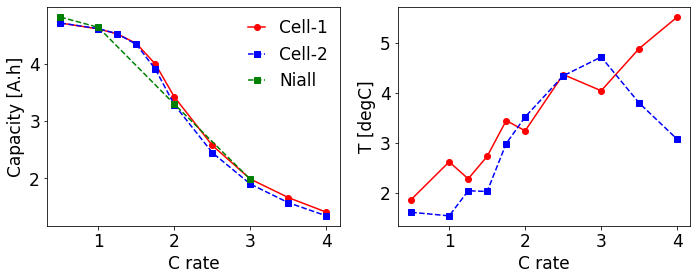

In [86]:
Niall_Crate = [0.2, 0.3, 0.4, 0.5, 1, 2, 3]; 
Niall_Cap = [ 4.815, 4.75, 4.82, 4.82, 4.64, 3.298, 1.983]; 

from scipy import signal
Cap_Cell_1 = []; Cap_Cell_2 = []; T_Rise_Cell_1 = []; T_Rise_Cell_2 = []; 
for i in np.arange(0,10,1):
    # For Cell 1
    cap = np.array(Cell_1_All[i]["Q discharge/mA.h"]-Cell_1_All[i]["Q discharge/mA.h"].iloc[0])/1e3
    Cap_Cell_1.append(cap[-1]);
    T1 = np.array(Cell_1_All[i]["Temperature/ｰC"]); 
    T1_sav = signal.savgol_filter(T1,50, 4) # The window length 50 is carefully selected after sensitivity analysis
    T_Rise_Cell_1.append(T1_sav[-1]-T1_sav[0])
    
    # For Cell 2
    cap2 = np.array(Cell_2_All[i]["Q discharge/mA.h"]-Cell_2_All[i]["Q discharge/mA.h"].iloc[0])/1e3
    Cap_Cell_2.append(cap2[-1]);
    T2 = np.array(Cell_2_All[i]["Temperature/ｰC"]); 
    T2_sav = signal.savgol_filter(T2,50, 4)
    T_Rise_Cell_2.append(T2_sav[-1]-T2_sav[0])

font = {'family' : 'DejaVu Sans','size'   : fs};mpl.rc('font', **font)

fig, axs = plt.subplots(1,2, figsize=(10,4.2),tight_layout=True)
axs[0].plot(Num_Crate, Cap_Cell_1 ,linestyle='-',marker ="o", color="r",label="Cell-1")
axs[0].plot(Num_Crate, Cap_Cell_2 ,linestyle='--',marker ="s",color="b",label="Cell-2")
axs[0].plot(Niall_Crate[3:], Niall_Cap[3:] ,linestyle='--',marker ="s",color="g",label="Niall")
axs[1].plot(Num_Crate, T_Rise_Cell_1 ,linestyle='-',marker ="o",color="r",label="Cell-1")
axs[1].plot(Num_Crate, T_Rise_Cell_2 ,linestyle='--',marker ="s",color="b",label="Cell-2")
axs[0].legend(prop={'family':'DejaVu Sans','size':fs},
    loc='best',ncol=1,frameon=False,markerscale=1,borderpad=0.2,handlelength=1.0,columnspacing=0.5)
axs[0].set_ylabel("Capacity [A.h]",fontsize=fs)
axs[1].set_ylabel("T [degC]",fontsize=fs)
axs[1].set_xlabel("C rate",fontsize=fs)
axs[0].set_xlabel("C rate",fontsize=fs)

In [ ]:
# Summarize Exp - plot temperature rise and capacity vs C rate
Niall_Crate = [0.2, 0.3, 0.4, 0.5, 1, 2, 3]; 
Niall_Cap = [ 4.815, 4.75, 4.82, 4.82, 4.64, 3.298, 1.983]; 
Ruihe_Crate = [0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0]
RL_Cap_Cell_1 = [4.715963693555362, 4.612124591646047, 4.525131462728684, 4.357837218694934, 3.9985270604389145, 3.4233452957546677, 2.5758641034678815, 1.988704897546658, 1.6652388357649741, 1.4100456949750437]
RL_Cap_Cell_2 = [4.716030959172494, 4.617948432702642, 4.5276396589819425, 4.341444372881664, 3.9091685871110027, 3.286849922924804, 2.4498175045751953, 1.901398288847656, 1.57583310209744, 1.345814775172526]
# Biologic temperature:
RL_T_Rise_Cell_1 = [1.8637965639005145, 2.6184089732547733, 2.2785406232761183, 2.7299726754489058, 3.4454458756196686, 3.2409775493440662, 4.36836993533397, 4.043625726318339, 4.889784013534822, 5.519928668485186]
RL_T_Rise_Cell_2 = [1.6080960965963662, 1.5360009591223402, 2.038724388471504, 2.0249414408349473, 2.984494420154249, 3.5199766991718633, 4.342076997341994, 4.719743013070929, 3.79700883048751, 3.071455647673517]
# from 1C to 3C only
Pico_T_Rise_Cell_1 =[
    26.643-25.982, 26.778-25.974,
    27.133-25.889,27.481-25.917,27.6-25.9,
    28.023-26,28.229-25.952
]
Pico_T_Rise_Cell_2 =[
    26.411-25.706,26.671-25.681,27.025-25.611,
    27.481-25.644,27.7-25.6,28.361-25.739, 28.832-25.633
]
# 3C    cell-1: 28.229-25.952     cell-2: 28.832-25.633
# 2.5C: cell-1: 28.023-26;        cell-2: 28.361-25.739
# 2C :  cell-1: 27.6-25.9         cell-2: 27.7-25.6 
# 1.75C:cell-1: 27.481-25.917     cell-2: 27.481-25.644
# 1.5C  cell-1: 27.133-25.889;    cell-2: 27.025-25.611
# 1.25C:cell-1: 26.778-25.974;    cell-2: 26.671-25.681
# 1C:   cell-1: 26.643-25.982;    cell-2: 26.411-25.706

font = {'family' : 'DejaVu Sans','size'   : 16};mpl.rc('font', **font)
fig, axs = plt.subplots(1,2, figsize=(10,4.2),tight_layout=True)
axs[0].plot(Ruihe_Crate, RL_Cap_Cell_1 ,linestyle='none',marker ="o", color="gray",label="Cell-1")
axs[0].plot(Ruihe_Crate, RL_Cap_Cell_2 ,linestyle='none',marker ="s",color="gray",label="Cell-2")
axs[0].plot(Niall_Crate[3:], Niall_Cap[3:] ,linestyle='none',marker ="s",color="gray",label="Niall")
axs[1].plot(Ruihe_Crate, RL_T_Rise_Cell_1 ,linestyle='none',marker ="o",color="gray",label="Bio-Cell-1")
axs[1].plot(Ruihe_Crate, RL_T_Rise_Cell_2 ,linestyle='none',marker ="s",color="gray",label="Bio-Cell-2")
#axs[1].plot(Ruihe_Crate[1:8], Pico_T_Rise_Cell_1 ,linestyle='--',marker ="o",color="k",label="Pico-Cell-1")
#axs[1].plot(Ruihe_Crate[1:8], Pico_T_Rise_Cell_2 ,linestyle='--',marker ="s",color="c",label="Pico-Cell-2")
axs[0].legend(prop={'family':'DejaVu Sans','size':fs},
    loc='best',ncol=1,frameon=False,markerscale=1,borderpad=0.2,handlelength=1.0,columnspacing=0.5)
axs[1].legend(prop={'family':'DejaVu Sans','size':fs-4},
    loc='best',ncol=2,frameon=False,markerscale=1,borderpad=0.2,handlelength=1.5,columnspacing=0.5)
axs[0].set_ylabel("Capacity [A.h]",fontsize=fs)
axs[1].set_ylabel("T [degC]",fontsize=fs)
axs[1].set_xlabel("C rate",fontsize=fs)
axs[0].set_xlabel("C rate",fontsize=fs)

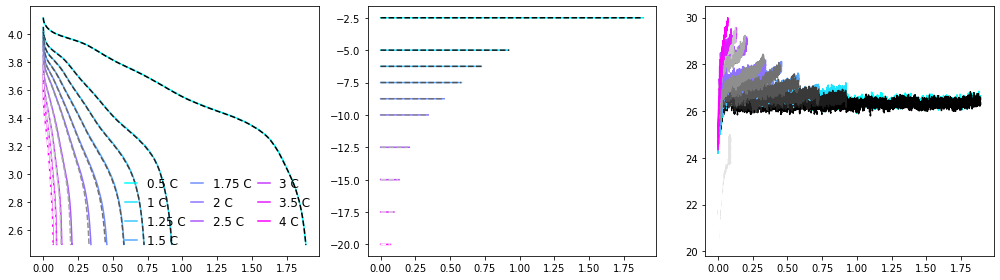

In [8]:
# plot them all
cm = mpl.cm.get_cmap("cool", 10)  
gray = mpl.cm.get_cmap("gray", 10)  

fig, axs = plt.subplots(1,3, figsize=(14,4),tight_layout=True)
for i in np.arange(0,10,1):
    axs[0].plot((Cell_1_All[i]["time/s"]-Cell_1_All[i]["time/s"].iloc[0])/3600,Cell_1_All[i]["Ecell/V"],linestyle='-',color=cm(i),label=f"{str_Crate[i]} C")
    axs[1].plot((Cell_1_All[i]["time/s"]-Cell_1_All[i]["time/s"].iloc[0])/3600,Cell_1_All[i]["I/mA"]/1e3, linestyle='-',color=cm(i))
    axs[2].plot((Cell_1_All[i]["time/s"]-Cell_1_All[i]["time/s"].iloc[0])/3600,Cell_1_All[i]["Temperature/ｰC"], linestyle='-',color=cm(i))
    axs[0].plot((Cell_2_All[i]["time/s"]-Cell_2_All[i]["time/s"].iloc[0])/3600,Cell_2_All[i]["Ecell/V"],linestyle='--',color=gray(i),)
    axs[1].plot((Cell_2_All[i]["time/s"]-Cell_2_All[i]["time/s"].iloc[0])/3600,Cell_2_All[i]["I/mA"]/1e3, linestyle='--',color=gray(i))
    axs[2].plot((Cell_2_All[i]["time/s"]-Cell_2_All[i]["time/s"].iloc[0])/3600,Cell_2_All[i]["Temperature/ｰC"], linestyle='--',color=gray(i))
   
axs[0].legend(prop={'family':'DejaVu Sans','size':fs-5},
    loc='best',ncol=3,frameon=False,markerscale=1,borderpad=0.2,handlelength=1.0,columnspacing=0.5)
    # # # # # handlelength=1.5 legend示意线长度， 默认是2；columnspacing顾名思义，默认是2；改这两个可以节约空间！

480 461 480
4.1802600000000005 3.544528050000082 4.068438921804606
3.8088569999999997 3.542947499999972 4.043625726318339


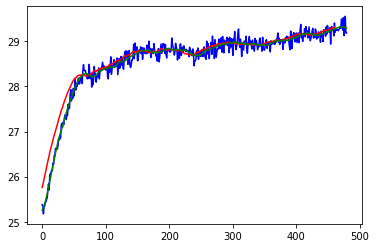

In [72]:
#print(Cell_2_All[-1]["Temperature/ｰC"].iloc[100:500])
from scipy import signal

#print(Cell_2_All[-1]["I/mA"].iloc[0:100]/1e3)
data = np.array(Cell_1_All[-3]["Temperature/ｰC"]);
window_width = 20
cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size
data_convolved_10 = np.convolve(data, kernel, mode='same')
# 
data_savgol = signal.savgol_filter(data,50, 4) # 

plt.plot(data,color="b")
plt.plot(ma_vec,color="r")
#plt.plot(data_convolved_10)
plt.plot(data_savgol,color="g")
print(np.size(data),np.size(ma_vec),np.size(data_savgol))
print(np.max(data)-data[0],np.max(ma_vec)-ma_vec[0],np.max(data_savgol)-data_savgol[0])
print(data[-1]-data[0],ma_vec[-1]-ma_vec[0],data_savgol[-1]-data_savgol[0])

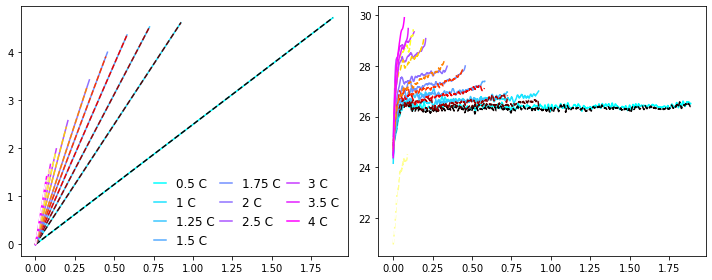

In [62]:
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size
# plot them all
cm = mpl.cm.get_cmap("cool", 10)  
gray = mpl.cm.get_cmap("hot", 10)  
fig, axs = plt.subplots(1,2, figsize=(10,4),tight_layout=True)
for i in np.arange(0,10,1):
    # 
    data = np.array(Cell_1_All[i]["Temperature/ｰC"]);  data_convolved_10 = np.convolve(data, kernel, mode='same')
    data_savgol = signal.savgol_filter(data,100, 4) # 
    t_1 = np.array((Cell_1_All[i]["time/s"]-Cell_1_All[i]["time/s"].iloc[0])/3600)
    #axs[0].plot(t_1,Cell_1_All[i]["Ecell/V"],linestyle='-',color=cm(i),label=f"{str_Crate[i]} C")
    cap = np.array(Cell_1_All[i]["Q discharge/mA.h"]-Cell_1_All[i]["Q discharge/mA.h"].iloc[0])/1e3
    axs[0].plot(t_1,cap,linestyle='-',color=cm(i),label=f"{str_Crate[i]} C")
    axs[1].plot(t_1,data_savgol, linestyle='-',color=cm(i))

    data = np.array(Cell_2_All[i]["Temperature/ｰC"]);  data_convolved_10 = np.convolve(data, kernel, mode='same')
    data_savgol = signal.savgol_filter(data,100, 4) # 
    t_2 = np.array((Cell_2_All[i]["time/s"]-Cell_2_All[i]["time/s"].iloc[0])/3600)
    #axs[0].plot(t_2,Cell_2_All[i]["Ecell/V"],linestyle='--',color=gray(i),)
    cap2 = np.array(Cell_2_All[i]["Q discharge/mA.h"]-Cell_2_All[i]["Q discharge/mA.h"].iloc[0])/1e3
    axs[0].plot(t_2,cap2,linestyle='--',color=gray(i),)
    axs[1].plot(t_2,data_savgol, linestyle='--',color=gray(i))
   
axs[0].legend(prop={'family':'DejaVu Sans','size':fs-5},
    loc='best',ncol=3,frameon=False,markerscale=1,borderpad=0.2,handlelength=1.0,columnspacing=0.5)
    # # # # # handlelength=1.5 legend示意线长度， 默认是2；columnspacing顾名思义，默认是2；改这两个可以节约空间！

In [ ]:
# Get Capacity and temperature rise:

tt = (Cell_1_All[0]["time/s"]-Cell_1_All[0]["time/s"].iloc[0])/3600
print(tt.iloc[-1]*2.5)
print(tt.iloc[-1]*2.5/4.8*100)

4.721486335369668
98.36429865353475


In [ ]:
tt = (Cell_2_All[0]["time/s"]-Cell_2_All[0]["time/s"].iloc[0])/3600
print(tt.iloc[-1]*2.5)

4.7210196686808334
